Download this page as a jupyter notebook at [Lesson 19](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson19/ENGR-1330-Lesson19.ipynb)

---

In [72]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


In [73]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

---
<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div>

Last GitHub Commit Date: 4 Nov 2021

## Lesson 19 :  Building Prediction Engines by Regression 

A procedure to model the relationship between one dependent variable and one or more independent variables and quantify the uncertainty involved in response predictions.

<!--![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)-->

## Objectives

- Create linear regression models from data using primitive python
- Create linear regression models from data using NumPy and Pandas tools
- Create presentation-quality graphs and charts for reporting results
---

## Computational Thinking Concepts

|Description|Computational Thinking Concept|
|:---|:---|
|Linear Model|Abstraction|
|Response and Explanatory Variables|Decomposition|
|Primitive arrays: vectors and matrices|Data Representation|
|NumPy arrays: vectors and matrices|Data Representation|
---

## Textbook Resources

[https://inferentialthinking.com/chapters/15/Prediction.html](https://inferentialthinking.com/chapters/15/Prediction.html)

<hr>


## Outline

- Linear Regression – purpose
- Background and simple by-hand examples
- Linear systems representation(s)


---

# Data Modeling: Regression Approach

Regression is a basic and commonly used type of predictive analysis.  
The overall idea of regression is to assess: 

- does a set of predictor/explainatory variables (features) do a good job in predicting an outcome (dependent/response) variable?  
- Which explainatory variables (features) in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  
- What is the estimated(predicted) value of the response under various excitation (explainatory) variable values?
- What is the uncertainty involved in the prediction?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  

The simplest form is a linear regression equation with one dependent(response) and one independent(explainatory) variable is defined by the formula 

$y_i = \beta_0 + \beta_1*x_i$, where $y_i$ = estimated dependent(response) variable value, $\beta_0$ = constant(intercept), $\beta_1$ = regression coefficient (slope), and $x_i$ = independent(predictor) variable value

---

## Fundamental Questions

- What is regression used for?
- Why is it useful?

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.

First, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.

Second, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  A typical question is, “how much additional sales income do I get for each additional $1000 spent on marketing?”

Third, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  A typical question is, “what will the price of gold be in 6 months?”

Consider the image below from a Texas Instruments Calculator user manual

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson19/PsuedoLesson/ti-manual.png)

In the context of our class, the straight solid line is the `Data Model` whose equation is
$Y = \beta_0 + \beta_1*X$.
The ordered pairs $(x_i,y_i)$ in the scatterplot are the observation (or training set).
As depicted here $Y$ is the response to different values of the explainitory variable $X$. The typical convention is response on the up-down axis, but not always.
The model parameters are $\beta_0$ and $\beta_1$ ; once known can estimate (predict) response to (as yet) unobserved values of $x$

Classically, the normal equations are evaluated to find the model parameters:

$\beta_1 = \frac{\sum x\sum y~-~N\sum xy}{(\sum x)^2~-~N\sum x^2}$ and $\beta_0 = \bar y - \beta_1 \bar x$

---

### Classical Regression by Normal Equations

We will illustrate the classical approach to finding the slope and intercept using the normal equations first a plotting function, then we will use the values from the Texas Instruments TI-55 user manual.

In [1]:
### Lets Make a Plotting Package

def makeAbear(xvalues,yvalues,xleft,yleft,xright,yright,xlab,ylab,title):
# plotting function dependent on matplotlib installed above 
# xvalues, yvalues == data pairs to scatterplot; FLOAT
# xleft,yleft == left endpoint line to draw; FLOAT
# xright,yright == right endpoint line to draw; FLOAT
# xlab,ylab == axis labels, STRINGS!!
# title == Plot title, STRING
    import matplotlib.pyplot 
    matplotlib.pyplot.scatter(xvalues,yvalues)
    matplotlib.pyplot.plot([xleft, xright], [yleft, yright], 'k--', lw=2, color="red")
    matplotlib.pyplot.xlabel(xlab)
    matplotlib.pyplot.ylabel(ylab)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.show()
    return

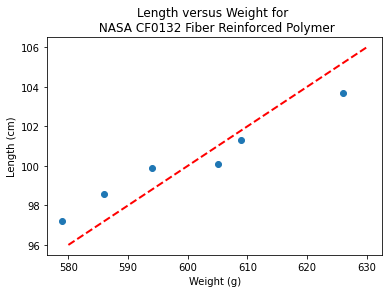

In [2]:
# Make two lists
sample_length = [101.3,103.7,98.6,99.9,97.2,100.1]
sample_weight = [609,626,586,594,579,605]
# We will assume weight is the explainatory variable, and it is to be used to predict length.
makeAbear(sample_weight, sample_length,580,96,630,106,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

Notice the dashed line, we supplied only two (x,y) pairs to plot the line, so lets get a colonoscope and find where it came from.

In [3]:
def myline(slope,intercept,value1,value2):
    '''Returns a tuple ([x1,x2],[y1,y2]) from y=slope*value+intercept'''
    listy = [] 
    listx = []
    listx.append(value1)
    listx.append(value2)
    listy.append(slope*listx[0]+intercept)
    listy.append(slope*listx[1]+intercept)
    return(listx,listy)

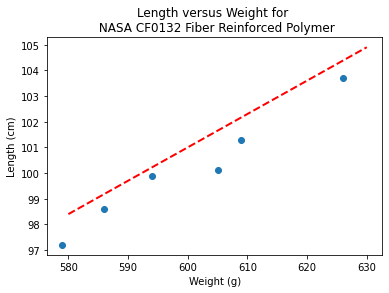

In [8]:
slope = 0.13  #0.13
intercept = 23 # 23
xlow = 580
xhigh = 630
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(sample_weight, sample_length,xone,yone,xtwo,ytwo,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

In [9]:
print(xone,yone)
print(xtwo,ytwo)

580 98.4
630 104.9


In [10]:
# Evaluate the normal equations
sumx = 0.0
sumy = 0.0
sumxy = 0.0
sumx2 = 0.0
sumy2 = 0.0
for i in range(len(sample_weight)):
    sumx = sumx + sample_weight[i]
    sumx2 = sumx2 + sample_weight[i]**2
    sumy = sumy + sample_length[i]
    sumy2 = sumy2 + sample_length[i]**2
    sumxy = sumxy + sample_weight[i]*sample_length[i]
b1 = (sumx*sumy - len(sample_weight)*sumxy)/(sumx**2-len(sample_weight)*sumx2)
b0 = sumy/len(sample_length) - b1* (sumx/len(sample_weight))
lineout = ("Linear Model is y=%.3f" % b1) + ("x + %.3f" % b0)
print("Linear Model is y=%.3f" % b1 ,"x + %.3f" % b0)

Linear Model is y=0.129 x + 22.813


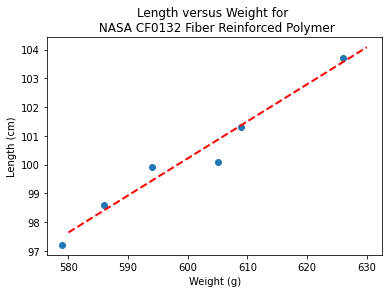

In [11]:
slope = 0.129  #0.129
intercept = 22.813  # 22.813
xlow = 580
xhigh = 630
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(sample_weight, sample_length,xone,yone,xtwo,ytwo,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

---

### Where do these normal equations come from?
Consider our linear model $y = \beta_0 + \beta_1 \cdot x + \epsilon$. Where $\epsilon$ is the error in the estimate. If we square each error and add them up (for our training set) we will have $\sum \epsilon^2 = \sum (y_i - \beta_0 - \beta_1 \cdot x_i)^2 $.  Our goal is to minimize this error by our choice of $\beta_0 $ and $ \beta_1 $

The necessary and sufficient conditions for a minimum is that the first partial derivatives of the `error` as a function must vanish (be equal to zero).  We can leverage that requirement as

$\frac{\partial(\sum \epsilon^2)}{\partial \beta_0} = \frac{\partial{\sum (y_i - \beta_0 - \beta_1 \cdot x_i)^2}}{\partial \beta_0} = - \sum 2[y_i - \beta_0 + \beta_1 \cdot x_i] = -2(\sum_{i=1}^n y_i - n \beta_0 - \beta_1 \sum_{i=1}^n x_i) = 0 $

and

$\frac{\partial(\sum \epsilon^2)}{\partial \beta_1} = \frac{\partial{\sum (y_i - \beta_0 - \beta_1 \cdot x_i)^2}}{\partial \beta_1} = - \sum 2[y_i - \beta_0 + \beta_1 \cdot x_i]x_i = -2(\sum_{i=1}^n x_i y_i - n \beta_0 \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2) = 0 $

Solving the two equations for $\beta_0$ and $\beta_1$ produces the normal equations (for linear least squares), which leads to

$\beta_1 = \frac{\sum x\sum y~-~n\sum xy}{(\sum x)^2~-~n\sum x^2}$
$\beta_0 = \bar y - \beta_1 \bar x$



Lets consider a more flexible way by fitting the data model using linear algebra instead of the summation notation.

---

### Computational Linear Algebra 
We will start again with our linear data model

$y_i = \beta_0 + \beta_1 \cdot x_i + \epsilon_i$  then replace with vectors as

\begin{gather}
\mathbf{Y}=
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
\vdots \\
1 & x_n & x_n^2\\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{\epsilon}=
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n \\
\end{pmatrix}
\end{gather}

So our system can now be expressed in matrix-vector form as

$\mathbf{Y}=\mathbf{X}\mathbf{\beta}+\mathbf{\epsilon}$ if we perfrom the same vector calculus as before we will end up with a result where pre-multiply by the transpose of $\mathbf{X}$ we will have a linear system in $\mathbf{\beta}$ which we can solve using Gaussian reduction, or LU decomposition or some other similar method.

The resulting system (that minimizes $\mathbf{\epsilon^T}\mathbf{\epsilon}$) is

$\mathbf{X^T}\mathbf{Y}=\mathbf{X^T}\mathbf{X}\mathbf{\beta}$ and solving for the parameters gives
$\mathbf{\beta}=(\mathbf{X^T}\mathbf{X})^{-1}\mathbf{X^T}\mathbf{Y}$

So lets apply it to our example - what follows is mostly in python primative

In [13]:
# linearsolver with pivoting adapted from 
# https://stackoverflow.com/questions/31957096/gaussian-elimination-with-pivoting-in-python/31959226
def linearsolver(A,b):
    n = len(A)
    M = A

    i = 0
    for x in M:
     x.append(b[i])
     i += 1
# row reduction with pivots
    for k in range(n):
     for i in range(k,n):
       if abs(M[i][k]) > abs(M[k][k]):
          M[k], M[i] = M[i],M[k]
       else:
          pass

     for j in range(k+1,n):
         q = float(M[j][k]) / M[k][k]
         for m in range(k, n+1):
            M[j][m] -=  q * M[k][m]
# allocate space for result
    x = [0 for i in range(n)]
# back-substitution
    x[n-1] =float(M[n-1][n])/M[n-1][n-1]
    for i in range (n-1,-1,-1):
      z = 0
      for j in range(i+1,n):
          z = z  + float(M[i][j])*x[j]
      x[i] = float(M[i][n] - z)/M[i][i]
# return result
    return(x)
#######

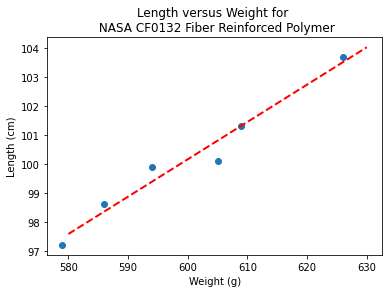

In [14]:
# matrix multiply script
def mmult(amatrix,bmatrix,rowNumA,colNumA,rowNumB,colNumB):
    result_matrix = [[0 for j in range(colNumB)] for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,colNumB):
            for k in range(0,colNumA):
                result_matrix[i][j]=result_matrix[i][j]+amatrix[i][k]*bmatrix[k][j]
    return(result_matrix)
# matrix vector multiply script
def mvmult(amatrix,bvector,rowNumA,colNumA):
    result_v = [0 for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,colNumA):
                result_v[i]=result_v[i]+amatrix[i][j]*bvector[j]
    return(result_v)

colNumX=2 #
rowNumX=len(sample_weight)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=sample_weight[irow]
    xtransp[1][irow]=sample_weight[irow]
    yvector[irow]   =sample_length[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system

slope = beta[1] #0.129
intercept = beta[0]  # 22.813
xlow = 580
xhigh = 630
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(sample_weight, sample_length,xone,yone,xtwo,ytwo,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

In [83]:
beta

[22.812624584693076, 0.12890365448509072]

---

#### What's the Value of the Computational Linear Algebra ?

The value comes when we have more explainatory variables, and we may want to deal with curvature.

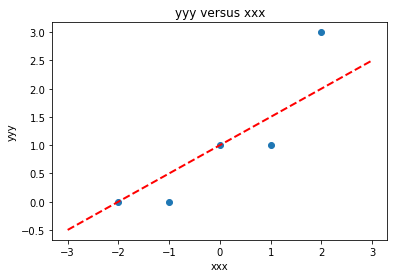

In [15]:
# Make two lists
yyy = [0,0,1,1,3]
xxx = [-2,-1,0,1,2]
slope = 0.5  #0.129
intercept = 1  # 22.813
xlow = -3
xhigh = 3
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(xxx, yyy,xone,yone,xtwo,ytwo,'xxx','yyy','yyy versus xxx')

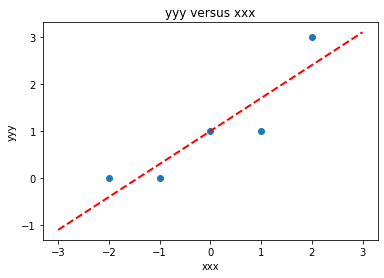

In [16]:
colNumX=2 #
rowNumX=len(xxx)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=xxx[irow]
    xtransp[1][irow]=xxx[irow]
    yvector[irow]   =yyy[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system

slope = beta[1] #0.129
intercept = beta[0]  # 22.813
xlow = -3
xhigh = 3
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(xxx, yyy,xone,yone,xtwo,ytwo,'xxx','yyy','yyy versus xxx')

In [17]:
colNumX=4 #
rowNumX=len(xxx)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=xxx[irow]
    xmatrix[irow][2]=xxx[irow]**2
    xmatrix[irow][3]=xxx[irow]**3
    xtransp[1][irow]=xxx[irow]
    xtransp[2][irow]=xxx[irow]**2
    xtransp[3][irow]=xxx[irow]**3
    yvector[irow]   =yyy[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system



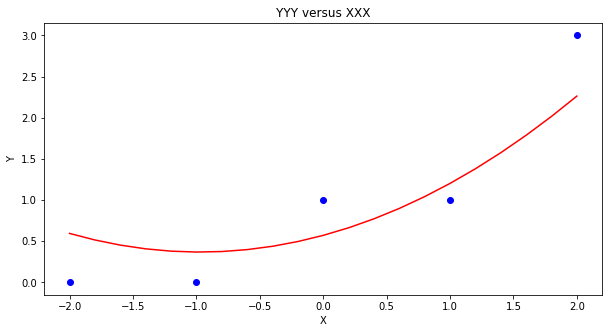

In [18]:
howMany = 20
xlow = -2
xhigh = 2
deltax = (xhigh - xlow)/howMany
xmodel = []
ymodel = []
for i in range(howMany+1):
    xnow = xlow + deltax*float(i)
    xmodel.append(xnow)
    ymodel.append(beta[0]+beta[1]*xnow+beta[2]*xnow**2)

# Now plot the sample values and plotting position
import matplotlib.pyplot 
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(xxx, yyy,  color ='blue') 
matplotlib.pyplot.plot(xmodel, ymodel,  color ='red') 
matplotlib.pyplot.ylabel("Y") 
matplotlib.pyplot.xlabel("X") 
mytitle = "YYY versus XXX"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

So in core python, there is a fair amount of work involved to write script - how about an easier way? First lets get things into a dataframe

In [19]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
from matplotlib import pyplot as plt

# Create a dataframe:
data = pd.DataFrame({'X':xxx, 'Y':yyy})
data

,X,Y
0,-2,0
1,-1,0
2,0,1
3,1,1
4,2,3


In [20]:
# repeat using statsmodel
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

In [21]:
model.params

Intercept    1.0
X            0.7
dtype: float64

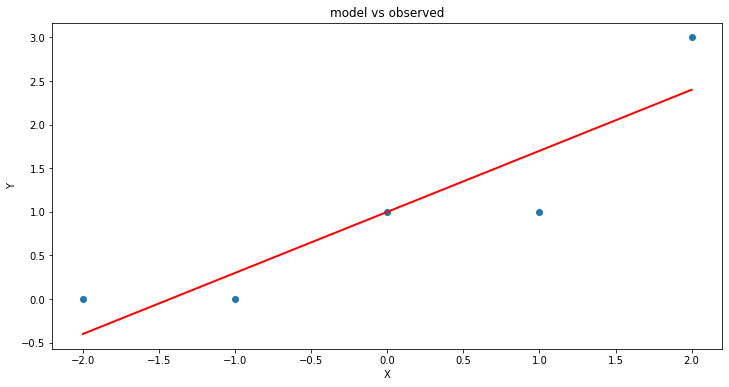

In [22]:
# Predict values
y_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=2)   # regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('model vs observed')

plt.show();

In [23]:
data['XX']=data['X']**2  # add a column of X^2
model = smf.ols('Y ~ X + XX', data=data) # model object constructor syntax
model = model.fit()
model.params

Intercept    0.571429
X            0.700000
XX           0.214286
dtype: float64

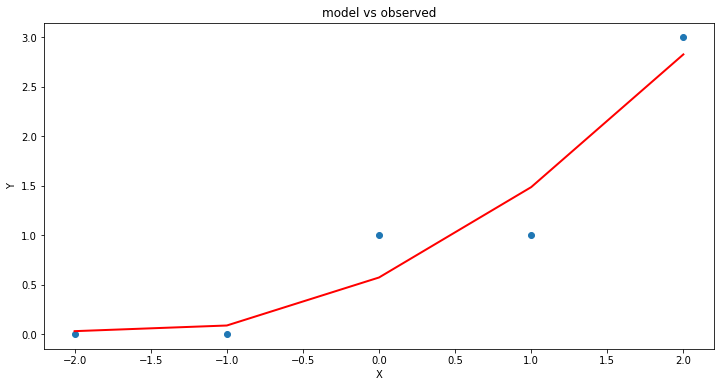

In [24]:
# Predict values
y_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=2)   # regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('model vs observed')

plt.show();

In [25]:
# repeat using sklearn
# Multiple Linear Regression with scikit-learn:
from sklearn.linear_model import LinearRegression

# Build linear regression model using X,XX as predictors
# Split data into predictors X and output Y
predictors = ['X', 'XX']
X = data[predictors]
y = data['Y']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [26]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 0.5714285714285716
betas = [0.7        0.21428571]


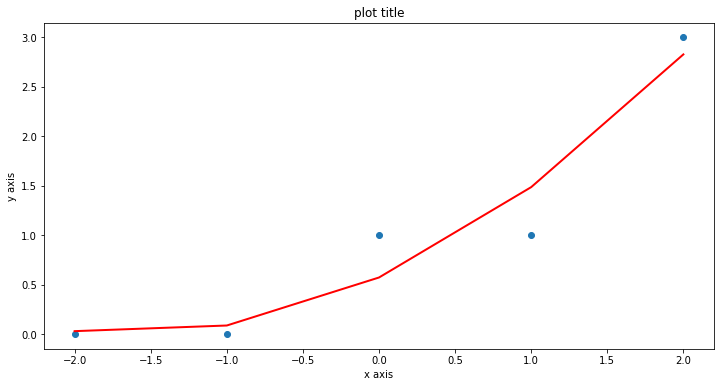

In [27]:
fitted = model.predict(X)

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], fitted,'r', linewidth=2)   # regression line
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('plot title')

plt.show();

Now lets go back to the original TI example

In [28]:
sample_length = [101.3,103.7,98.6,99.9,97.2,100.1]
sample_weight = [609,626,586,594,579,605]
data = pd.DataFrame({'X':sample_weight, 'Y':sample_length})
data

,X,Y
0,609,101.3
1,626,103.7
2,586,98.6
3,594,99.9
4,579,97.2
5,605,100.1


In [29]:

# Build linear regression model using X,XX as predictors
# Split data into predictors X and output Y
predictors = ['X']
X = data[predictors]
y = data['Y']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 22.812624584717568
betas = [0.12890365]


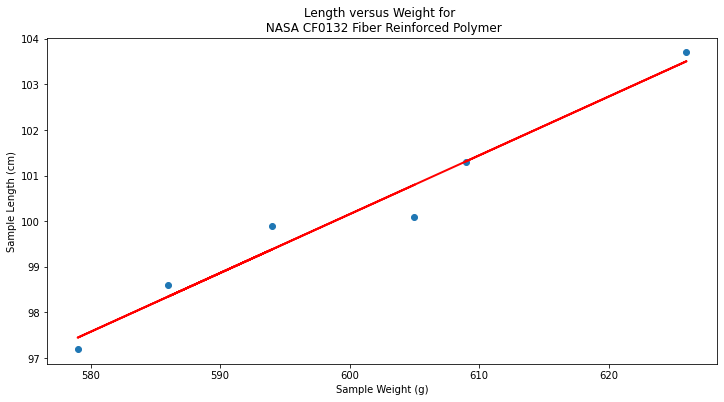

In [30]:
fitted = model.predict(X)
xvalue=data['X'].to_numpy()

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(xvalue, fitted, 'r', linewidth=2)   # regression line
plt.xlabel('Sample Weight (g)')
plt.ylabel('Sample Length (cm)')
plt.title('Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

plt.show();